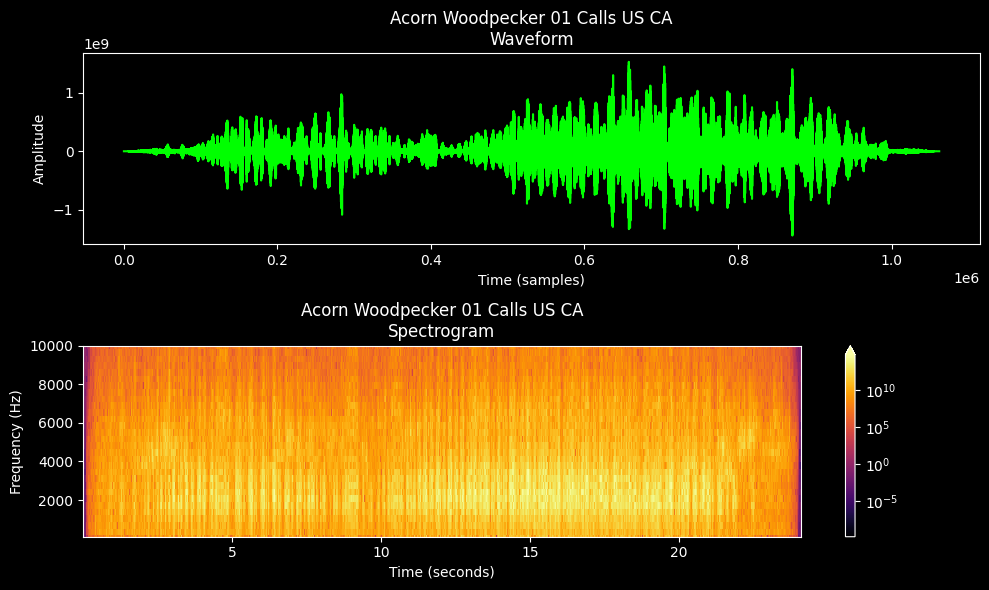

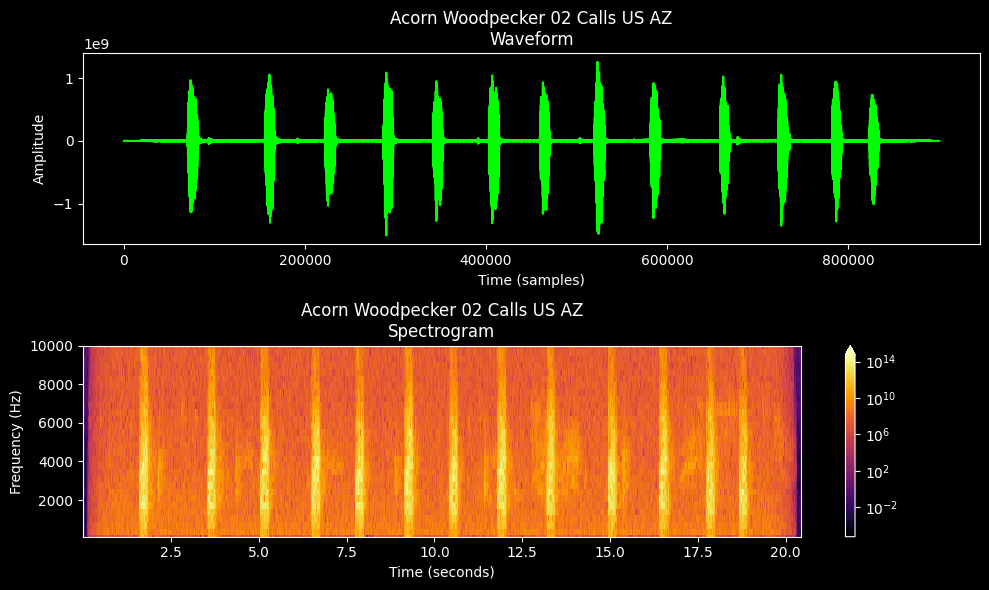

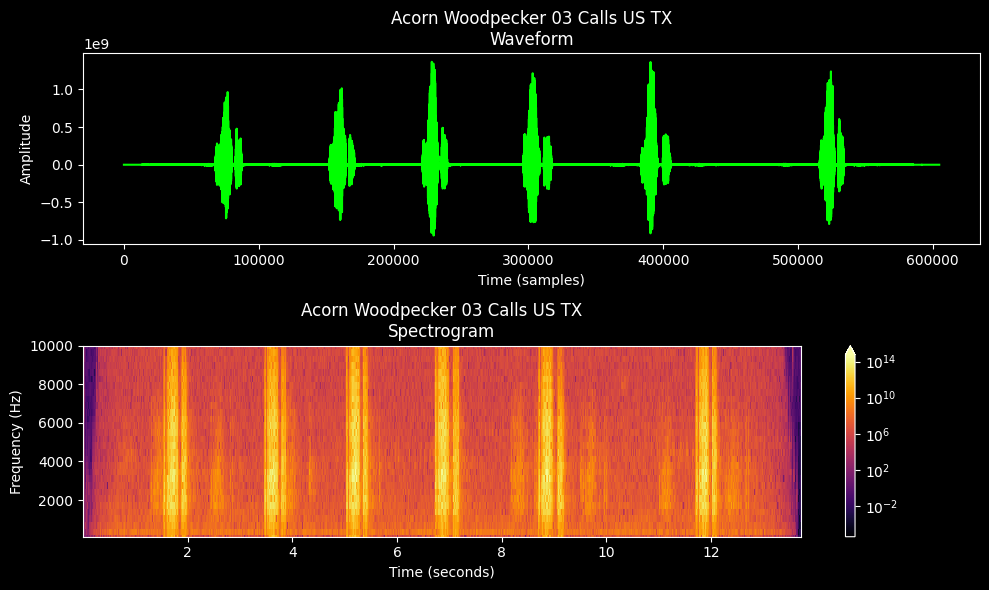

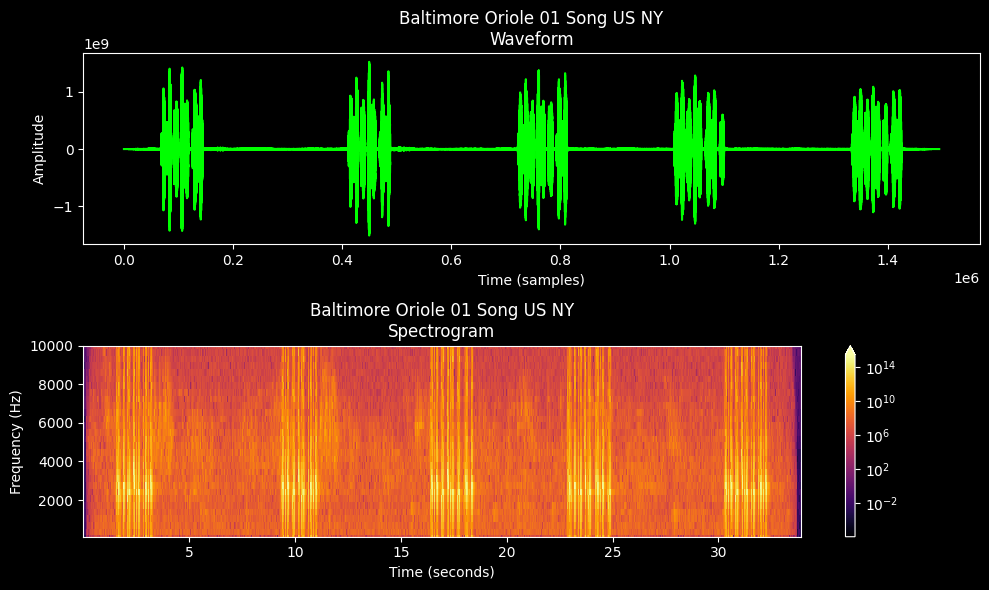

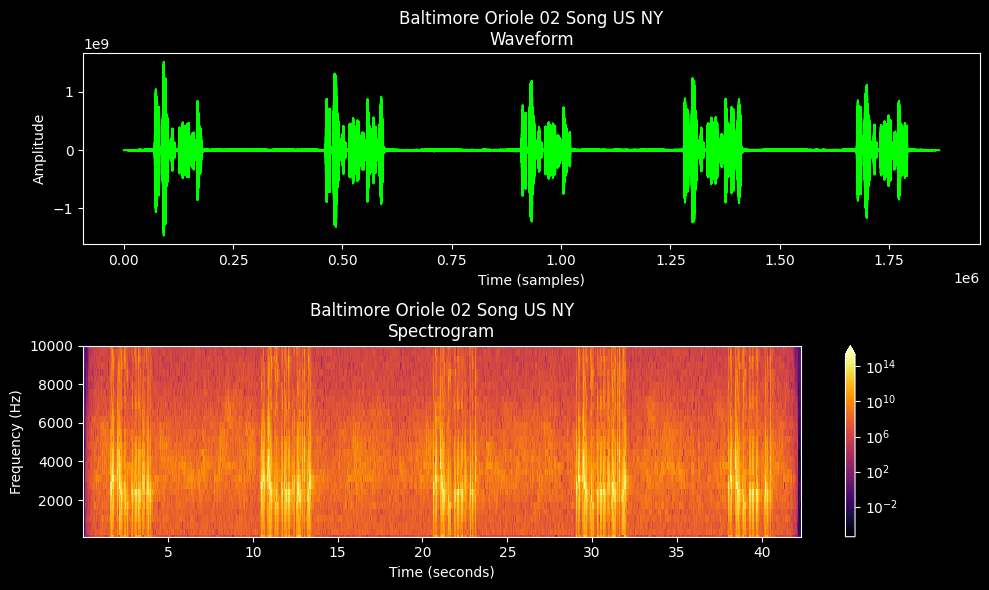

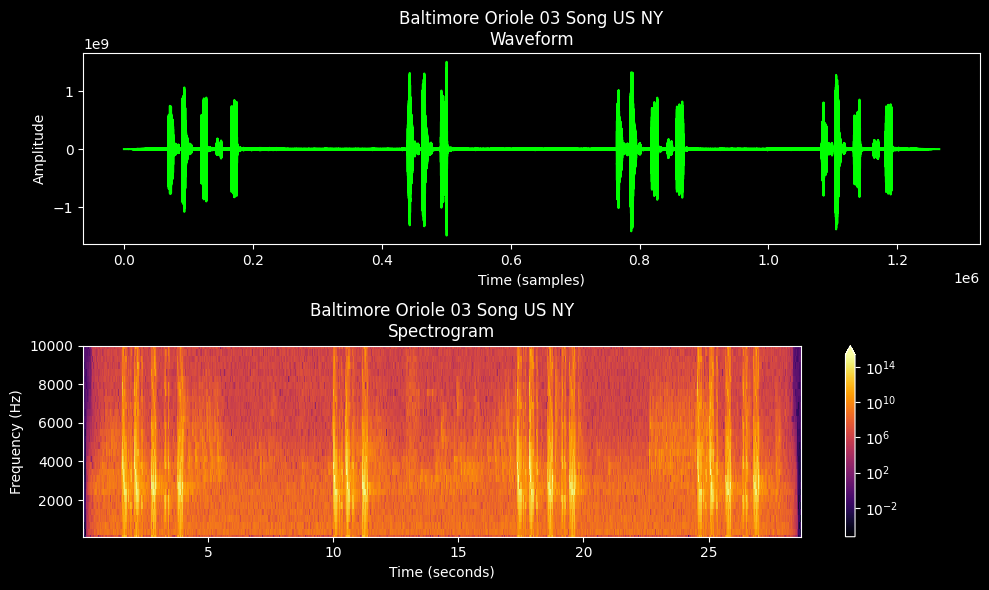

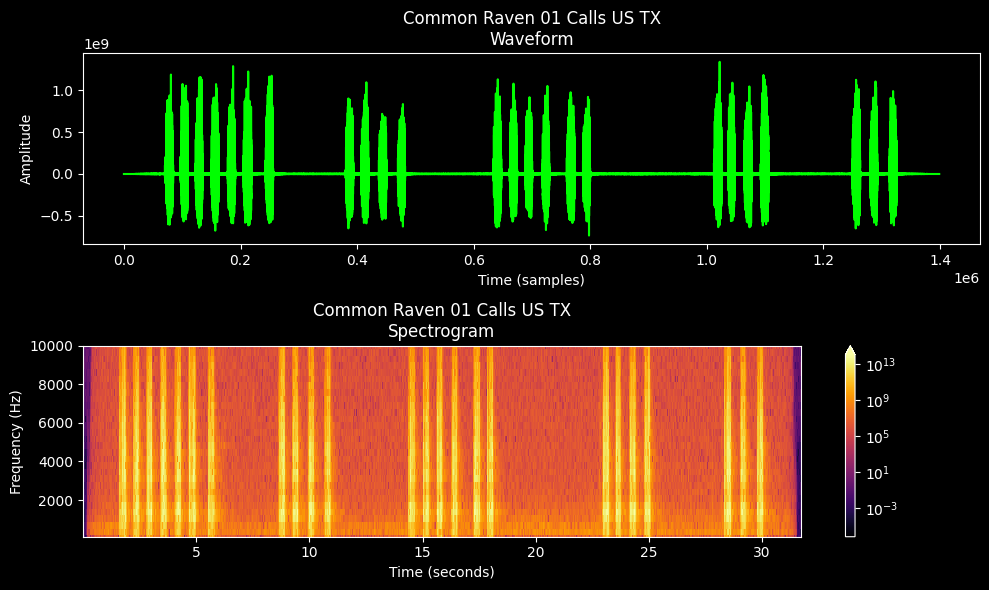

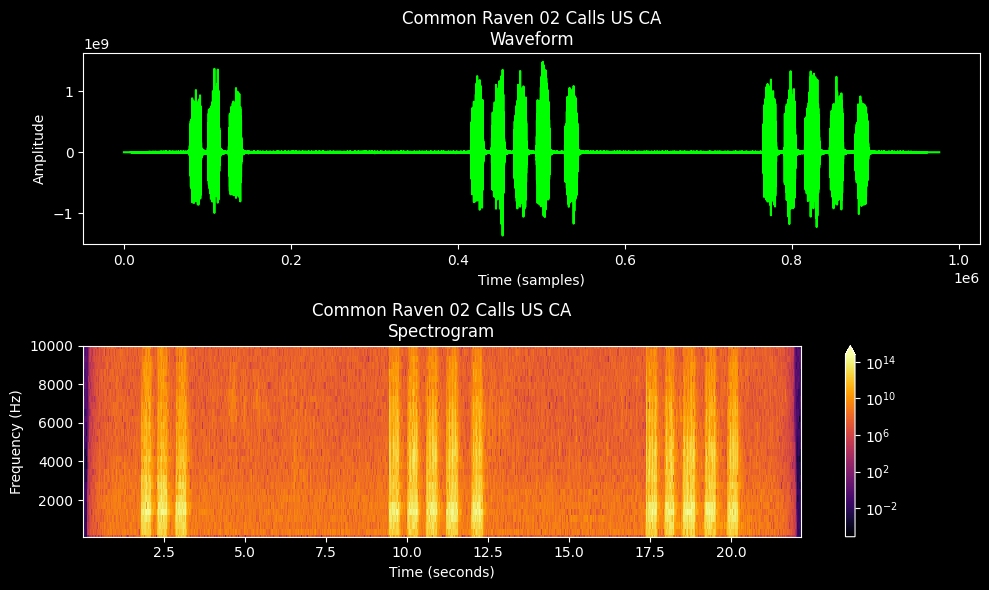

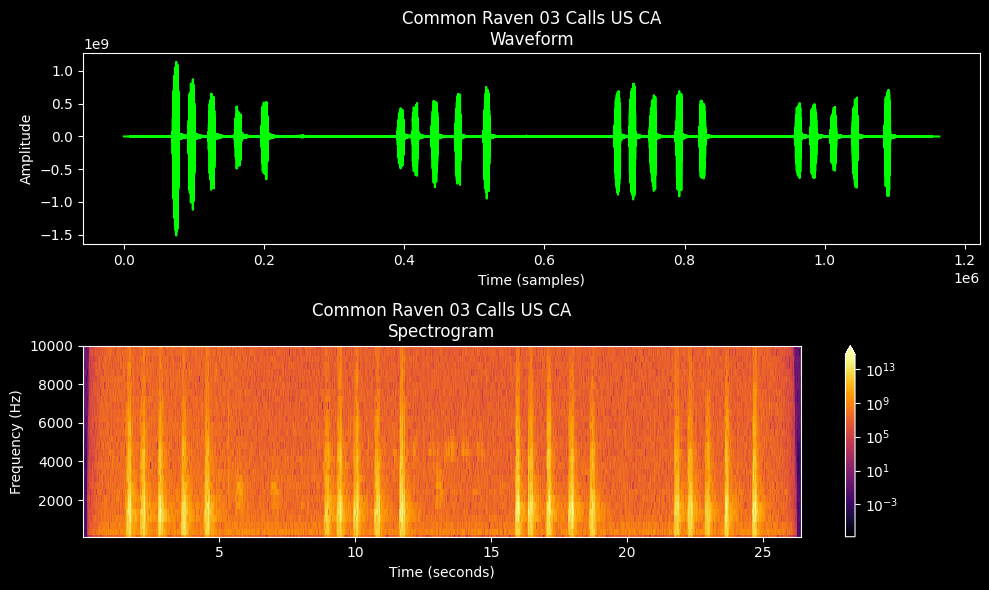

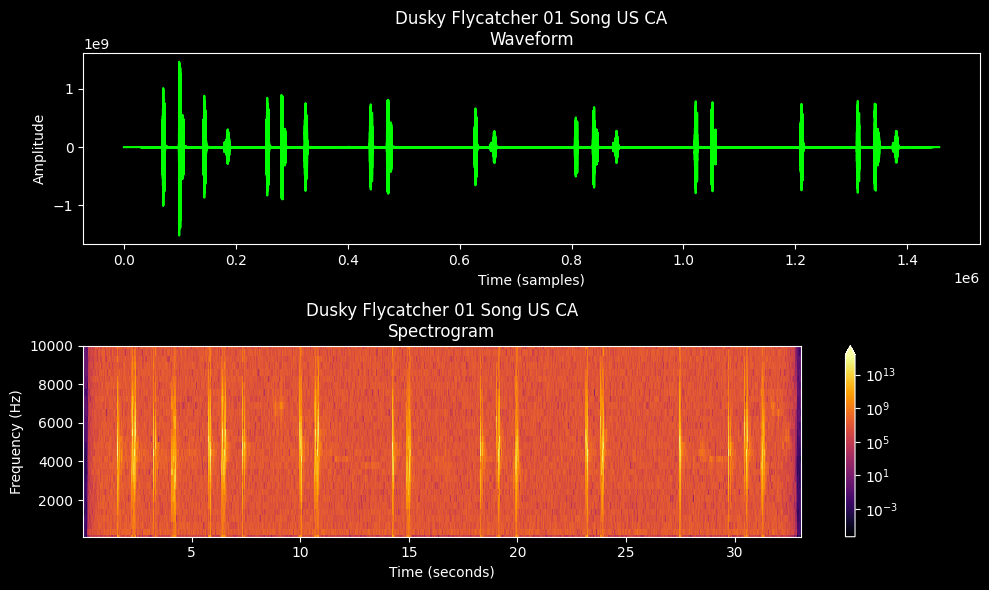

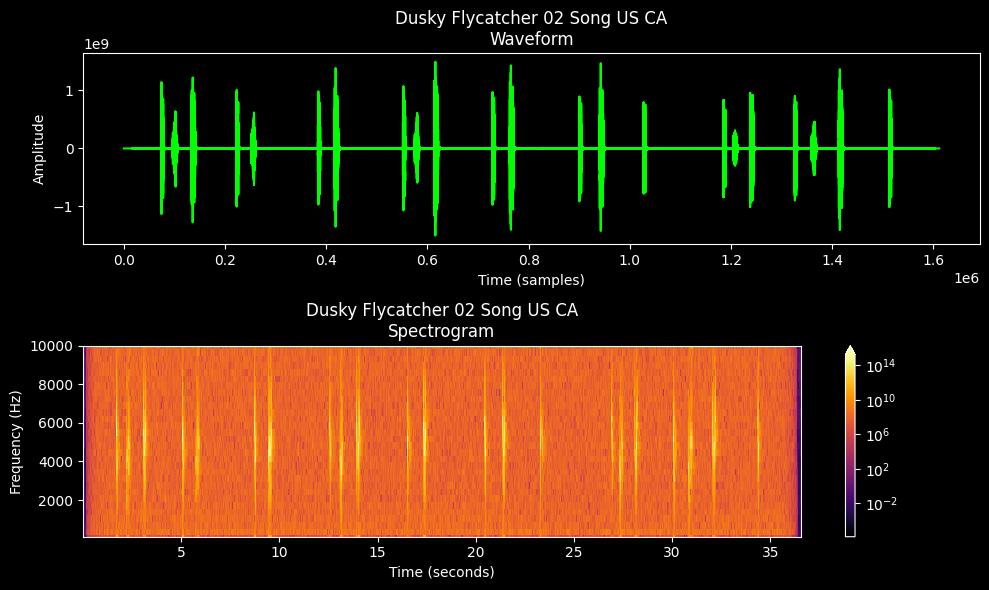

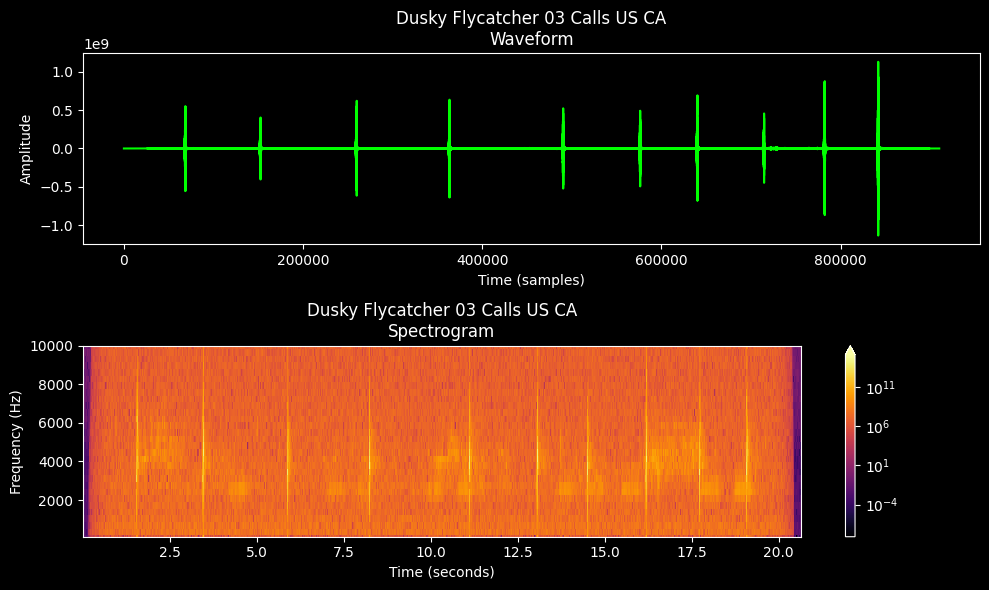

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.io import wavfile
from scipy import signal
import warnings

plt.style.use('dark_background')

# Define the path to the directory containing the audio files
directory = 'path/to/your/wavs/'

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.wav'):
        file_path = os.path.join(directory, filename)

        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=wavfile.WavFileWarning)
            sampling_rate, audio = wavfile.read(file_path)

        # If the audio is stereo, convert it to mono by averaging the two channels
        if audio.ndim == 2:
            audio = np.mean(audio, axis=1)

        # Create a figure and add two subplots for the waveform and spectrogram
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

        # Remove the "_" and the ".wav" from the displayed filename
        display_filename = filename[:-4].replace('_', ' ')

        # Plot the waveform of the audio file
        ax1.plot(audio, color='lime')
        ax1.set_title(f'{display_filename}\nWaveform')
        ax1.set_xlabel('Time (samples)')
        ax1.set_ylabel('Amplitude')

        # Set the nperseg parameter based on the audio length (smaller for better time resolution)
        nperseg = min(128, len(audio))

        # Generate the spectrogram of the audio file
        frequencies, times, spectrogram = signal.spectrogram(audio, fs=sampling_rate, nperseg=nperseg)

        # Set the minimum and maximum frequency values for the spectrogram plot
        min_freq = 100  # set the minimum frequency
        max_freq = 10000  # set the maximum frequency

        # Compute appropriate vmin and vmax values based on the non-zero elements of the spectrogram
        non_zero_elements = spectrogram[spectrogram > 0]
        if non_zero_elements.size > 0:
            vmin = np.min(non_zero_elements)
            vmax = np.max(non_zero_elements)
        else:
            vmin = 1e-6
            vmax = 1e-2

        # Plot the spectrogram of the audio file with the specified frequency range
        pcm = ax2.pcolormesh(times, frequencies, spectrogram, shading='auto', norm=LogNorm(vmin=vmin, vmax=vmax), cmap='inferno')
        ax2.set_title(f'{display_filename}\nSpectrogram')
        ax2.set_xlabel('Time (seconds)')
        ax2.set_ylabel('Frequency (Hz)')
        ax2.set_ylim([min_freq, max_freq])

        # Add a colorbar for the spectrogram
        fig.colorbar(pcm, ax=ax2, extend='max')

        # Show the combined plot for waveform and spectrogram
        plt.tight_layout()
        plt.show()


